In [4]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv


In [8]:
# Importing the data and displaying some rows
data_train = pd.read_csv("/kaggle/input/titanic/train.csv")
data_test = pd.read_csv("/kaggle/input/titanic/test.csv")

# df aka dataframe, is the the dataset can be manipulated via the panda library.
display(data_train.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Check typical statistic of the model such as its attributes, average, min, max and etc. 
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# **Data Preperation**

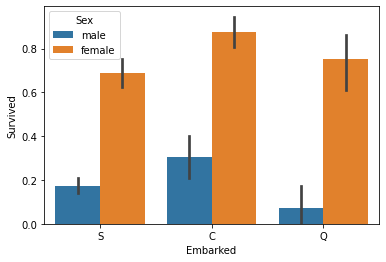

In [10]:

# My first intuition is to find patterns in data that could be seen useful.
# I will use seasborn graphing api to see possible patterns in the dataset.
sns.barplot(x="Embarked", y="Survived", hue="Sex", data=data_train);



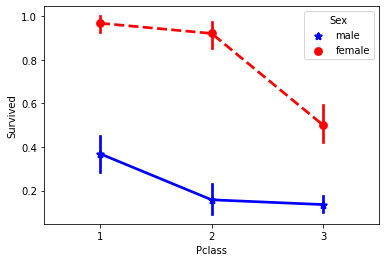

In [17]:

sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=data_train,
              palette={"male": "blue", "female": "red"},
              markers=["*", "o"], linestyles=["-", "--"]);



# Pattern Finding
Based on the charts above, gender seems to be distinct charactersitic of wether a passenger survived.

In [21]:
women = data_train.loc[data_train.Sex == 'female']["Survived"]

rate = sum(women) / len(women)
print("Percentage of women who survived:", 100 * rate)


men = data_train.loc[data_train.Sex == 'male']["Survived"]

rate = sum(men) / len(men)
print("Percentage of men who survived:", 100 * rate)

Percentage of women who survived: 74.20382165605095
Percentage of men who survived: 18.890814558058924


# Modeling

In [ ]:
# Importing the RandomForestClassifier from Scitkit learn
from sklearn.ensemble import RandomForestClassifier

# Our Y value is predictor column in the dataset. 
# In this case Survive, wheere 0 means death, and 1 means living

y = data_train["Survived"]
print(y)